<a href="https://colab.research.google.com/github/ducthpoc/DataAnlalysis-AustinDavis/blob/main/DataAnalyticsEp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection, linear_model

dataFile = files.upload()
df = pd.read_csv(io.BytesIO(dataFile['world_happiness_2016.csv']))

Saving world_happiness_2016.csv to world_happiness_2016 (1).csv


In [ ]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [ ]:
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [ ]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
dataset = df.copy()

In [ ]:
dataset.rename(columns = {"Health (Life Expectancy)": "Health", "Economy (GDP per Capita)":"Economy", "Trust (Government Corruption)": "Trust"}, inplace = True)
dataset.drop(columns = ["Lower Confidence Interval", "Upper Confidence Interval"], inplace = True)
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
dataset.loc[:, "Happiness Score":].mean()

Happiness Score      5.382185
Economy              0.953880
Family               0.793621
Health               0.557619
Freedom              0.370994
Trust                0.137624
Generosity           0.242635
Dystopia Residual    2.325807
dtype: float64

In [ ]:
dataset.loc[:, "Happiness Score":].median()

Happiness Score      5.31400
Economy              1.02780
Family               0.84142
Health               0.59659
Freedom              0.39747
Trust                0.10547
Generosity           0.22245
Dystopia Residual    2.29074
dtype: float64

In [ ]:
dataset.loc[:, "Happiness Score":].std()

Happiness Score      1.141674
Economy              0.412595
Family               0.266706
Health               0.229349
Freedom              0.145507
Trust                0.111038
Generosity           0.133756
Dystopia Residual    0.542220
dtype: float64

In [ ]:
dataset[["Country", "Happiness Score"]].sort_values(by = "Happiness Score", ascending = False).head()

,Country,Happiness Score
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [ ]:
dataset[["Country", "Happiness Score"]].sort_values(by = "Happiness Score", ascending = False).tail()

,Country,Happiness Score
152,Benin,3.484
153,Afghanistan,3.360
154,Togo,3.303
155,Syria,3.069
156,Burundi,2.905


In [ ]:
dataset[["Country", "Health"]].sort_values(by = "Health", ascending = False).tail()

,Country,Health
102,Nigeria,0.05108
140,Angola,0.04991
138,Ivory Coast,0.04476
143,Chad,0.03824
110,Sierra Leone,0.00000


In [ ]:
dataset[["Region", "Happiness Score"]].groupby(by = "Region").describe()

Happiness Score                             \
                                          count      mean       std    min   
Region                                                                       
Australia and New Zealand                   2.0  7.323500  0.014849  7.313   
Central and Eastern Europe                 29.0  5.370690  0.590395  4.217   
Eastern Asia                                6.0  5.624167  0.526885  4.907   
Latin America and Caribbean                24.0  6.101750  0.725680  4.028   
Middle East and Northern Africa            19.0  5.386053  1.057559  3.069   
North America                               2.0  7.254000  0.212132  7.104   
Southeastern Asia                           9.0  5.338889  0.930686  3.907   
Southern Asia                               7.0  4.563286  0.616190  3.360   
Sub-Saharan Africa                         38.0  4.136421  0.558494  2.905   
Western Europe                             21.0  6.685667  0.789190  5.033   

                                                                  
                                     25%     50%      75%    max  
Region                                                            
Australia and New Zealand        7.31825  7.3235  7.32875  7.334  
Central and Eastern Europe       5.14500  5.4880  5.81300  6.596  
Eastern Asia                     5.29825  5.6465  5.89950  6.379  
Latin America and Caribbean      5.80225  6.1260  6.66275  7.087  
Middle East and Northern Africa  4.78350  5.3030  6.29700  7.267  
North America                    7.17900  7.2540  7.32900  7.404  
Southeastern Asia                4.87600  5.2790  6.00500  6.739  
Southern Asia                    4.40950  4.6430  4.96250  5.196  
Sub-Saharan Africa               3.74500  4.1300  4.43325  5.648  
Western Europe                   6.36100  6.9070  7.33900  7.526

In [ ]:
dataset[["Region", "Happiness Score"]].groupby(by = "Region").mean().sort_values(by = "Happiness Score", ascending = False)

,Happiness Score
Region,
Australia and New Zealand,7.323500
North America,7.254000
Western Europe,6.685667
Latin America and Caribbean,6.101750
Eastern Asia,5.624167
Middle East and Northern Africa,5.386053
Central and Eastern Europe,5.370690
Southeastern Asia,5.338889
Southern Asia,4.563286


In [ ]:
dataset.groupby(by = "Region").mean().sort_values(by = "Happiness Score", ascending = False)

<ipython-input-30-548009ec6f06>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(by = "Region").mean().sort_values(by = "Happiness Score", ascending = False)


,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
Region,,,,,,,,,
Australia and New Zealand,8.500000,7.323500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
North America,9.500000,7.254000,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335
Western Europe,29.190476,6.685667,1.417056,1.042452,0.825754,0.477587,0.232544,0.304715,2.385576
Latin America and Caribbean,48.333333,6.101750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
Eastern Asia,67.166667,5.624167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
Middle East and Northern Africa,78.105263,5.386053,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
Central and Eastern Europe,78.448276,5.370690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
Southeastern Asia,80.000000,5.338889,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
Southern Asia,111.714286,4.563286,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101


<ipython-input-37-562f108e5978>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanRegions = dataset.groupby(by = "Region").mean()


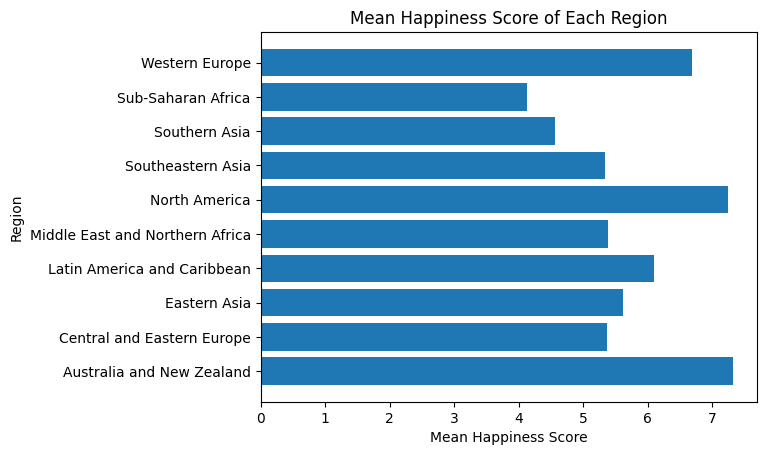

In [ ]:
meanRegions = dataset.groupby(by = "Region").mean()

plt.barh(meanRegions.index, meanRegions["Happiness Score"])
plt.ylabel("Region")
plt.xlabel("Mean Happiness Score")
plt.title("Mean Happiness Score of Each Region")

plt.show()

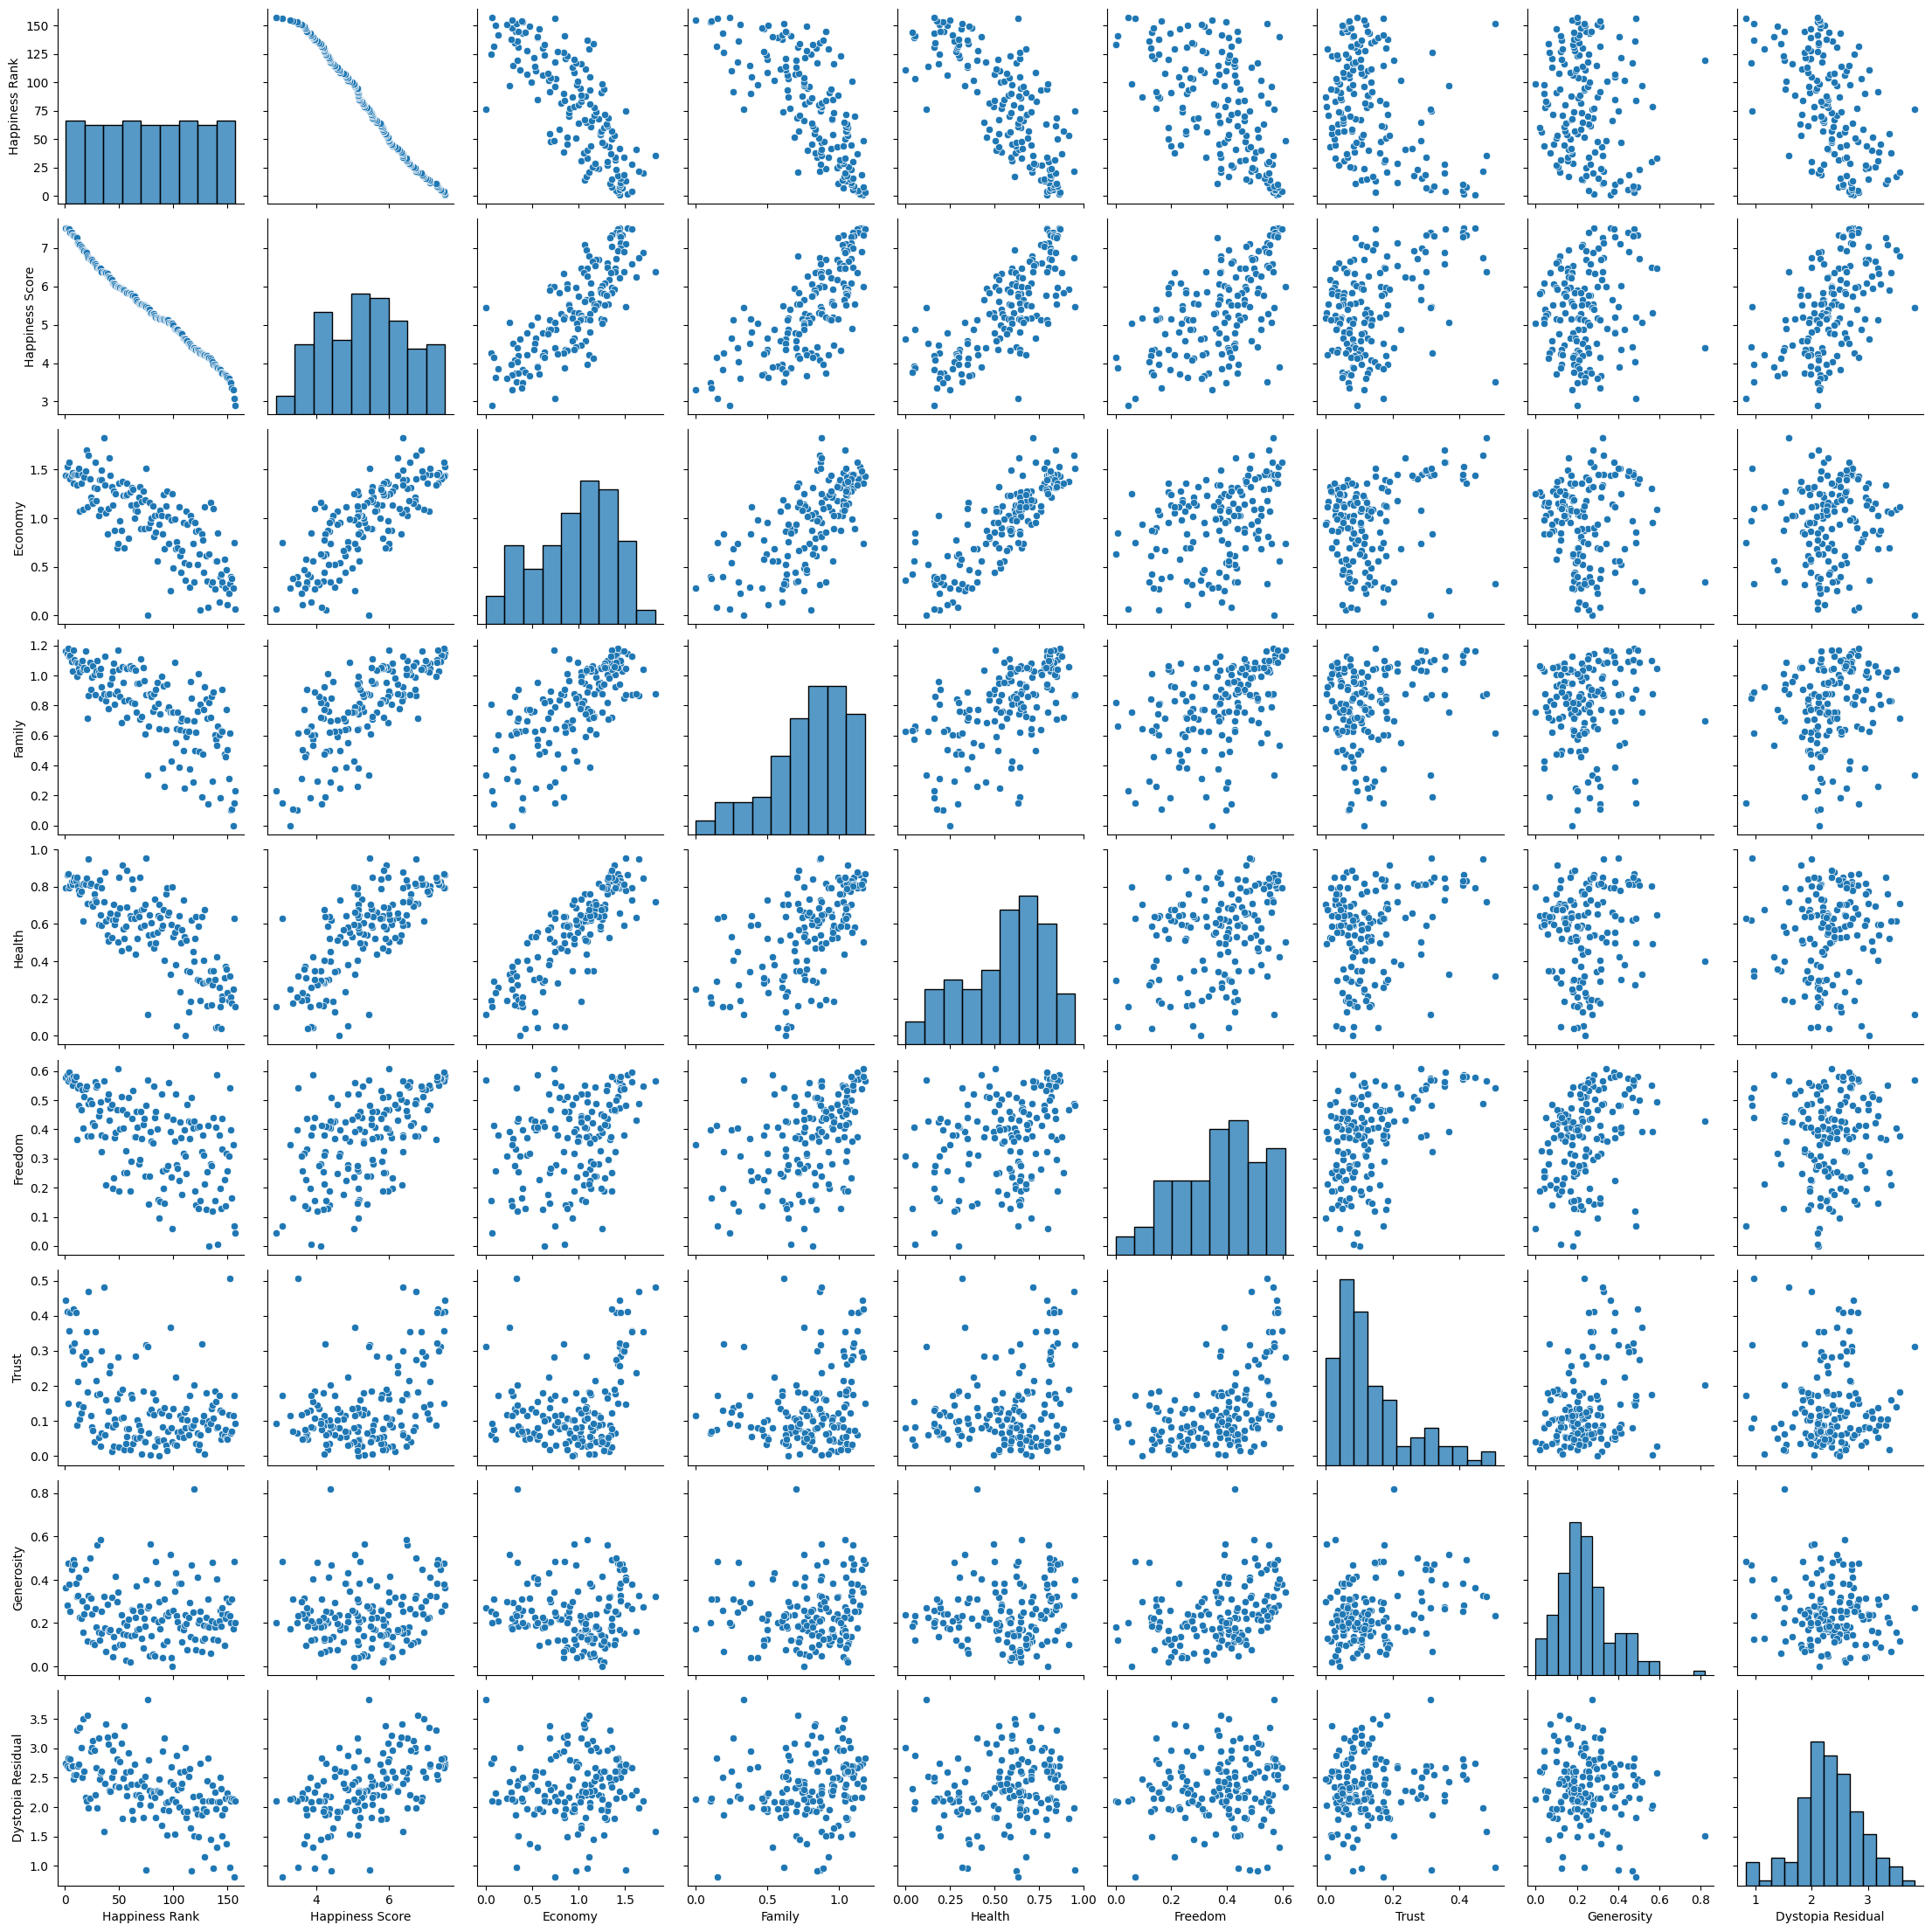

In [ ]:
sns.pairplot(dataset)

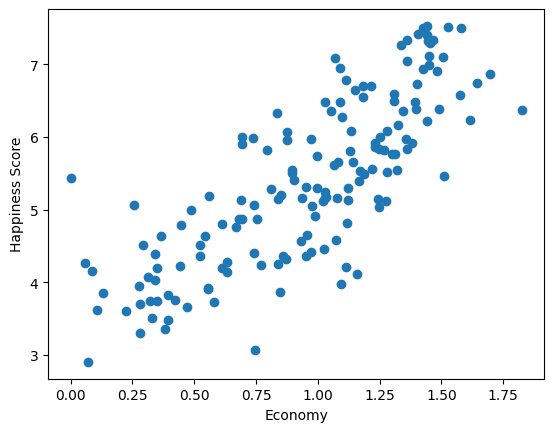

In [ ]:
plt.scatter(dataset["Economy"], dataset["Happiness Score"])

plt.xlabel("Economy")
plt.ylabel("Happiness Score")

plt.show()

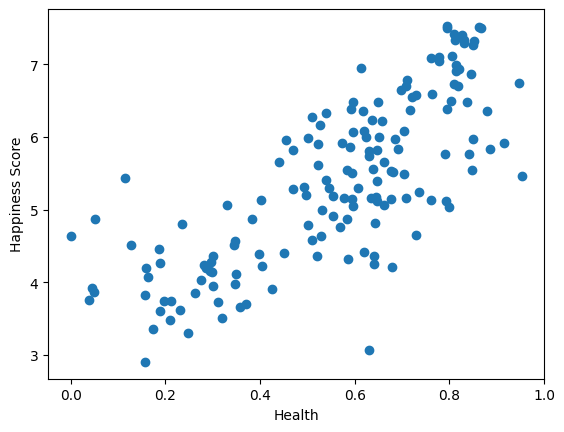

In [ ]:
plt.scatter(dataset["Health"], dataset["Happiness Score"])

plt.xlabel("Health")
plt.ylabel("Happiness Score")

plt.show()

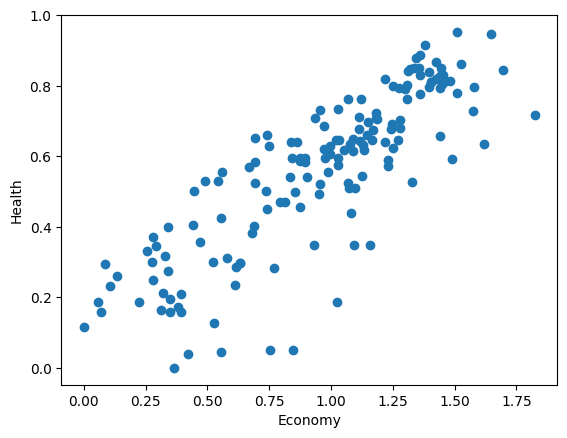

In [ ]:
plt.scatter(dataset["Economy"], dataset["Health"])

plt.xlabel("Economy")
plt.ylabel("Health")

plt.show()

In [ ]:
xvar = ["Economy", "Health", "Family"]
yvar = "Happiness Score"

x = np.array(dataset[xvar])
y = np.array(dataset[yvar]).reshape(-1, 1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.20)

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)


LinearRegression()

In [ ]:
print("Slope/Coefficient:", linear.coef_)
print("Y-Intercept", linear.intercept_)

# y = mx + b
# y = 3.81x + 3.28

Slope/Coefficient: [[0.78681393 1.50903099 1.57824737]]
Y-Intercept [2.54005291]


In [ ]:
linear.score(x_test, y_test)

0.723991972646314

In [ ]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
  print("Actual Value:", y_test[x], "Predicted Value:", predictions[x])

Actual Value: [0.54039] Predicted Value: [0.50275245]
Actual Value: [0.61804] Predicted Value: [0.60490512]
Actual Value: [0.29981] Predicted Value: [0.24074387]
Actual Value: [0.52116] Predicted Value: [0.55867602]
Actual Value: [0.54] Predicted Value: [0.53408857]
Actual Value: [0.6458] Predicted Value: [0.59633932]
Actual Value: [0.28212] Predicted Value: [0.47303676]
Actual Value: [0.3494] Predicted Value: [0.6544781]
Actual Value: [0.70766] Predicted Value: [0.54925317]
Actual Value: [0.62366] Predicted Value: [0.69799087]
Actual Value: [0.49374] Predicted Value: [0.55731318]
Actual Value: [0.29364] Predicted Value: [0.15269738]
Actual Value: [0.37109] Predicted Value: [0.24282795]
Actual Value: [0.80991] Predicted Value: [0.76890108]
Actual Value: [0.52989] Predicted Value: [0.36563876]
Actual Value: [0.85102] Predicted Value: [0.74647733]
Actual Value: [0.11466] Predicted Value: [0.1119103]
Actual Value: [0.53119] Predicted Value: [0.34062045]
Actual Value: [0.03824] Predicted V

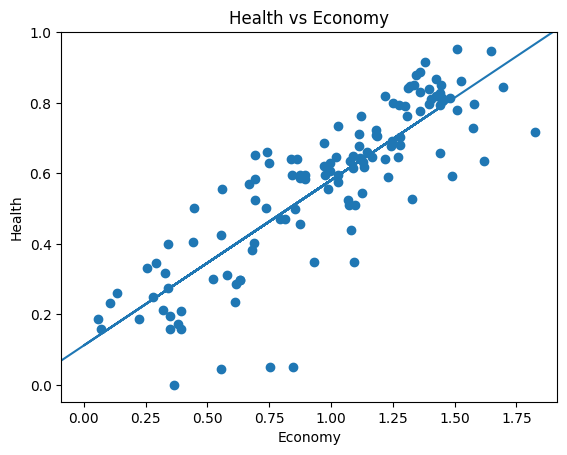

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_test, predictions)
plt.axline(xy1 = (0, float(linear.intercept_)), slope = float(linear.coef_))

plt.xlabel(xvar)
plt.ylabel(yvar)
plt.title(yvar + " vs " + xvar)

plt.show()